# Fourier Transforms of Lorenz Attractors

We've been talking about the Lorenz attractors, a set of 3 coupled differential equations that exhibit highly nonlinear behavior. The differential equations are:

$$
\dfrac{dx}{dt} = \sigma (y-x) \\
\dfrac{dy}{dt} = rx - y - xz \\
\dfrac{dz}{dt} = xy - bz 
$$

These can be integrated using `scipy.integrate.odeint`, which is illustrated in Notebook 1. In this notebook, we investigate the effect that the parameters $\sigma, r, b$ have on the frequency spectrum of the differential equation solutions $(x, y, z)$.

In [1]:
%load_ext base16_mplrc
%base16_mplrc dark bespin

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.
Setting plotting theme to bespin-dark. Palette available in b16_colors


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from lorenz_rhs import lorenz, get_lorenz_solution

## Raw FFT

We begin with a raw FFT of the variables $(x,y,z)$:

In [5]:
in_0 = [5.0, 5.0, 5.0]
t_max = 100
dt = 0.01
t_steps = t_max/dt
t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                            (10.0, 8/3, 28))

In [11]:
from seaborn import xkcd_palette as xkcd
blue, red, green = xkcd(['cornflower','dusty red','bluish green'])

In [12]:
from scipy.ndimage import gaussian_filter1d

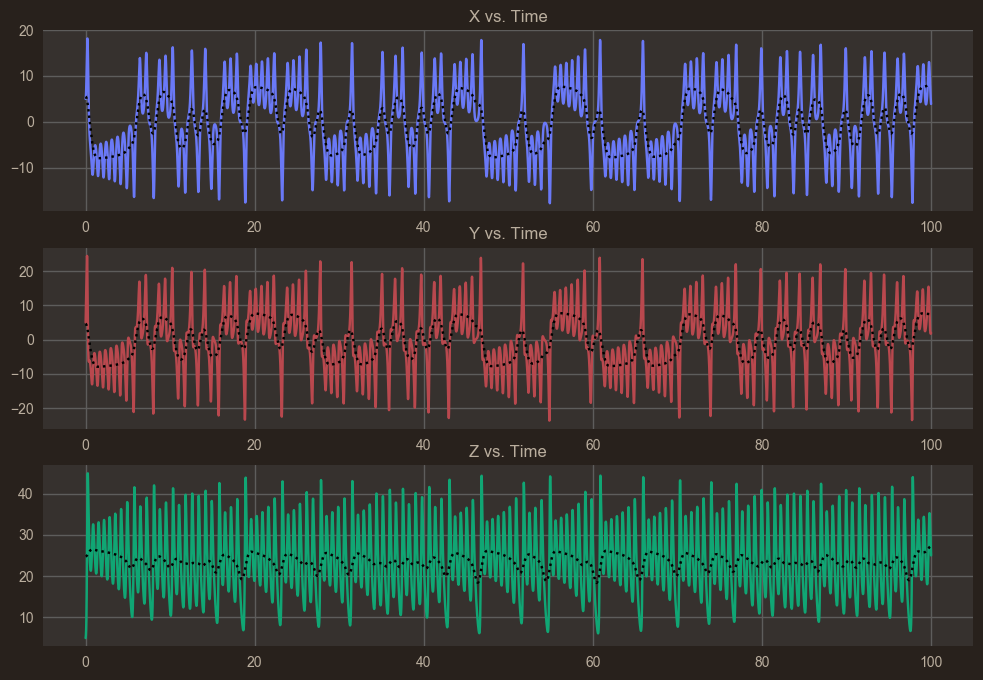

In [13]:
fig = plt.figure(figsize=(12,8))
ax1, ax2, ax3 = [fig.add_subplot(3,1,i+1) for i in range(3)]

sig = 40.0

ax1.plot(t[-10000:], solx[-10000:], color=blue)
ax1.plot(t[-10000:], gaussian_filter1d(solx[-10000:],sig),'k:')

ax2.plot(t[-10000:], soly[-10000:], color=red)
ax2.plot(t[-10000:], gaussian_filter1d(soly[-10000:],sig),'k:')

ax3.plot(t[-10000:], solz[-10000:], color=green)
ax3.plot(t[-10000:], gaussian_filter1d(solz[-10000:],sig),'k:')

ax1.set_title("X vs. Time")
ax2.set_title("Y vs. Time")
ax3.set_title("Z vs. Time")

plt.show()

Applying a Gaussian 1D filter damps out some of the high frequency fluctuations. Let's compare the FFT of the original and the filtered sequences:

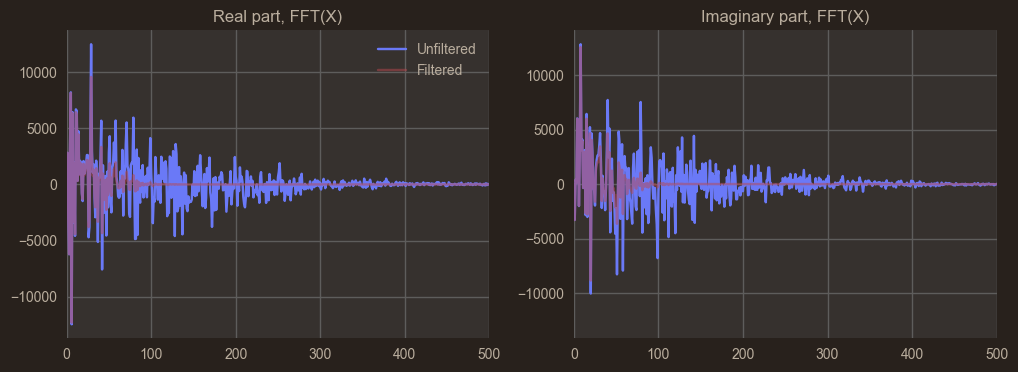

In [14]:
from scipy.fftpack import ifft, rfft, fft

fig = plt.figure(figsize=(12,4))
ax1, ax2 = [fig.add_subplot(1,2,i+1) for i in range(2)]

ax1.plot(np.real(fft(solx)), color=blue, label='Unfiltered')
ax1.plot(np.real(fft(gaussian_filter1d(solx,sig))), label='Filtered',
         color=red, alpha=0.5)
ax1.set_title("Real part, FFT(X)")

ax2.plot(np.imag(fft(solx)), color=blue, label='Unfiltered')
ax2.plot(np.imag(fft(gaussian_filter1d(solx,sig))), label='Filtered',
         color=red, alpha=0.5,)
ax2.set_title("Imaginary part, FFT(X)")

ax1.set_xlim([0,500])
ax2.set_xlim([0,500])
ax1.legend()
plt.show()

Compare the FFT of each of the variables:

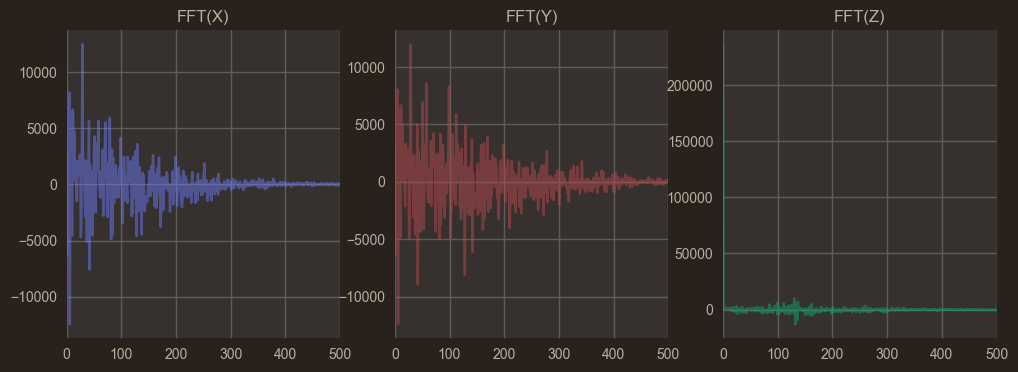

In [15]:
fig = plt.figure(figsize=(12,4))
axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

titles = ['FFT(X)','FFT(Y)','FFT(Z)']

for ax, sol, color, title in zip(axes,[solx,soly,solz],[blue,red,green],titles):
    ff = np.real(fft(sol))
    ax.plot(ff, color=color, alpha=0.5)
    ax.set_xlim([0,500])
    ax.set_title(title)
    
plt.show()

The power spectra can be obtained by integrating $x(t)^2$ and finding its spectral signature:

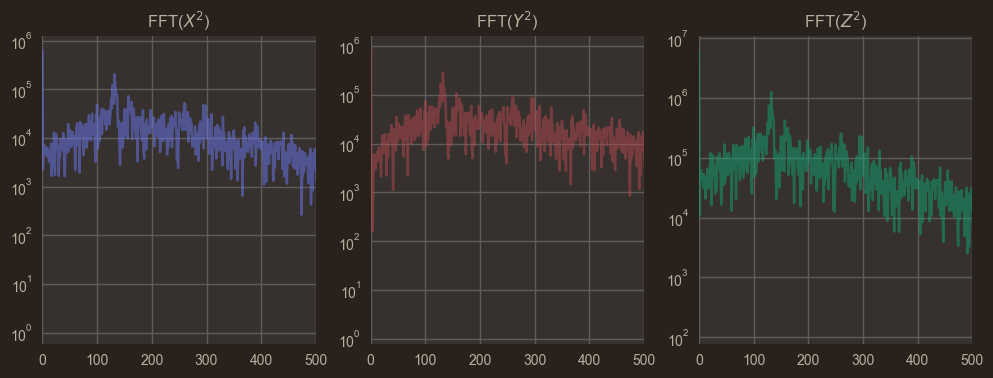

In [16]:
fig = plt.figure(figsize=(12,4))
axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

titles = [r'FFT($X^2$)',r'FFT($Y^2$)',r'FFT($Z^2$)']

for ax, sol, color, title in zip(axes,[solx,soly,solz],[blue,red,green],titles):
    ff = np.abs(fft(sol*sol))
    ax.semilogy(ff, color=color, alpha=0.5)
    ax.set_xlim([0,500])
    ax.set_title(title)
    
plt.show()

Investigate the impact of total number of timesteps on power spectrum:

In [17]:
in_0 = [5.0, 5.0, 5.0]

solutions = []

t_maxes = np.logspace(2,4,5)

for t_max in t_maxes:
    
    print("On t_max = %0.1f"%(t_max))

    dt = 0.01
    t_steps = t_max/dt
    solution_tuple = get_lorenz_solution(in_0, t_max, t_steps, 
                                            (10.0, 8/3, 28))
    solutions.append(solution_tuple)
    
print("All done!")

On t_max = 100.0
On t_max = 316.2
On t_max = 1000.0
On t_max = 3162.3
On t_max = 10000.0
All done!


Plotting solution for tmax = 100
Plotting solution for tmax = 316
Plotting solution for tmax = 1000
Plotting solution for tmax = 3162
Plotting solution for tmax = 10000


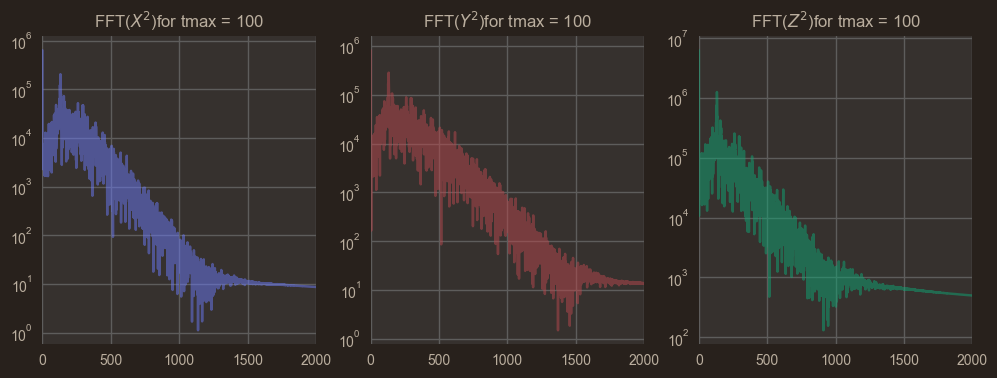

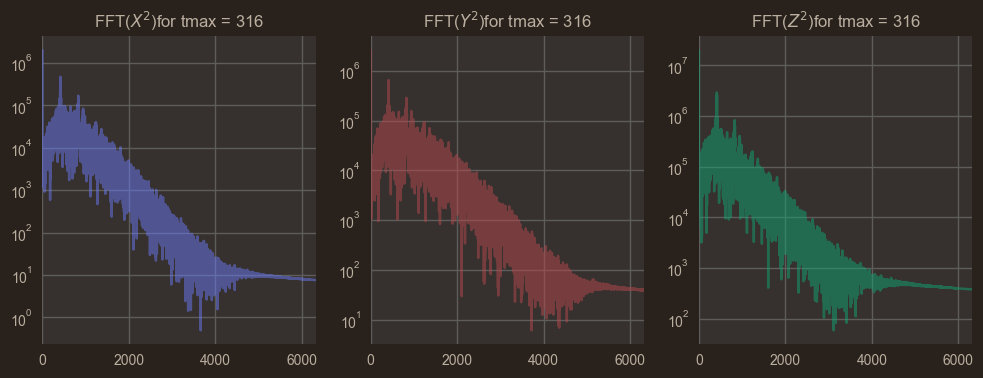

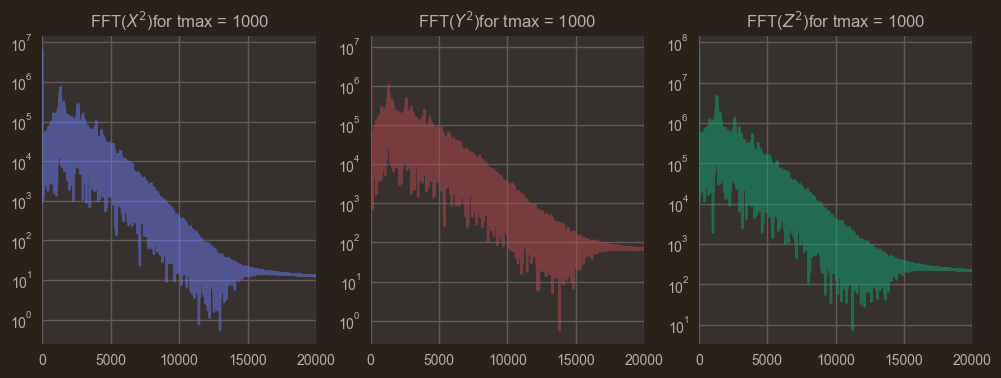

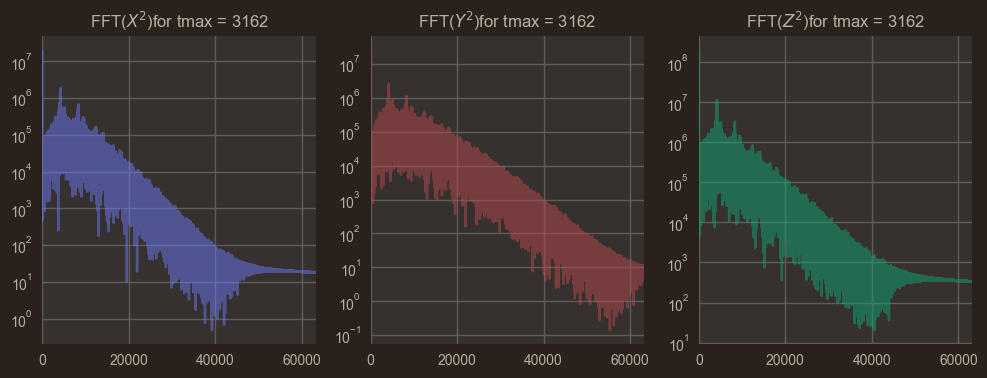

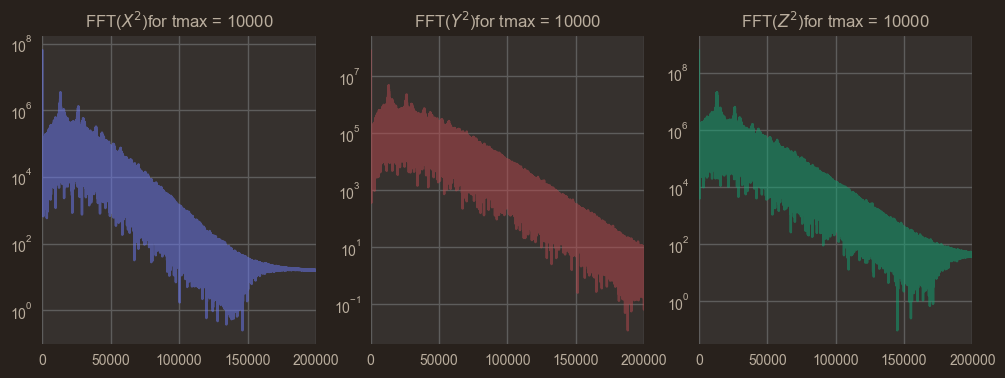

In [18]:
for t_max, solution_tuple in zip(t_maxes,solutions):
    
    print("Plotting solution for tmax = %d"%(t_max))
    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    titles = [r'FFT($X^2$)',r'FFT($Y^2$)',r'FFT($Z^2$)']

    t, (solx, soly, solz) = solution_tuple
    
    for ax, sol, color, title in zip(axes,[solx,soly,solz],[blue,red,green],titles):
        title += "for tmax = %d"%(t_max)
        ff = np.abs(fft(sol*sol))
        ax.semilogy(ff, color=color, alpha=0.5)
        ax.set_xlim([0,20*t_max])
        ax.set_title(title)
    
plt.show()

Next we'll investigate the effect of each parameter on the spectra of the time series generated.

## Effect of $r$ on Spectra

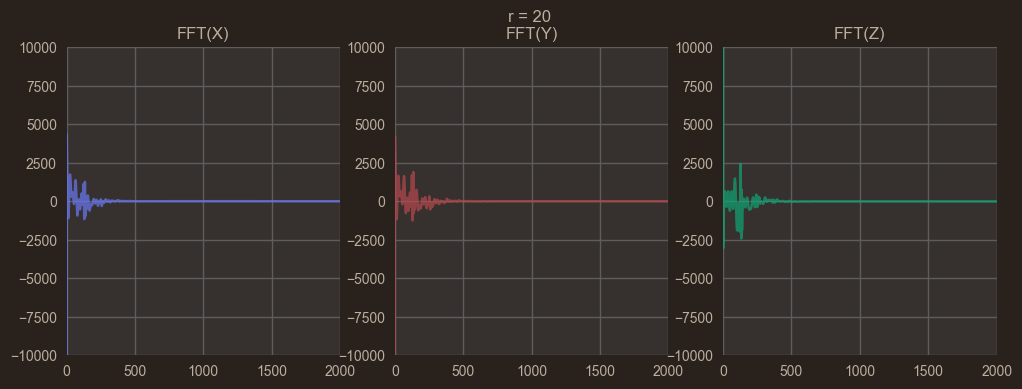

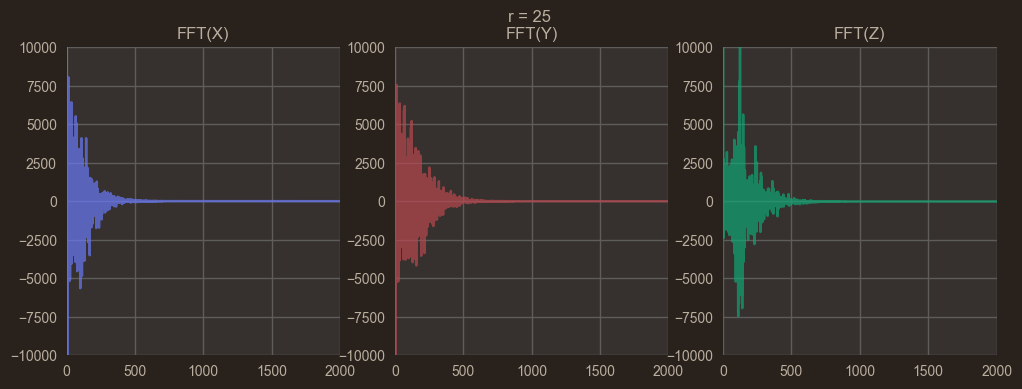

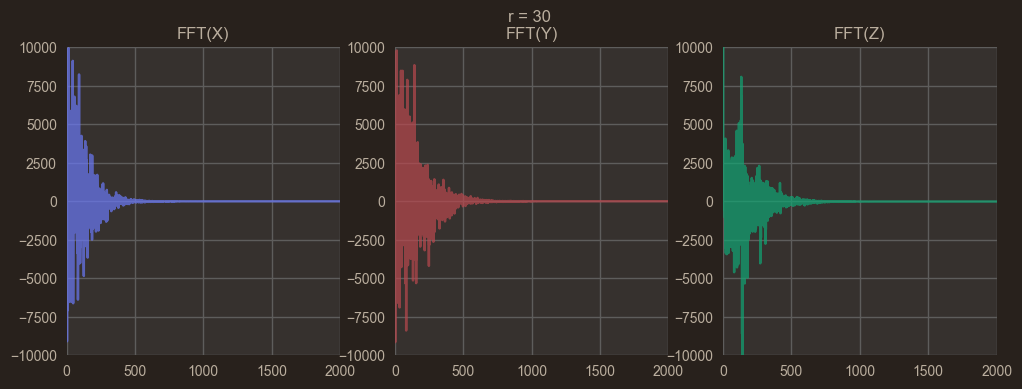

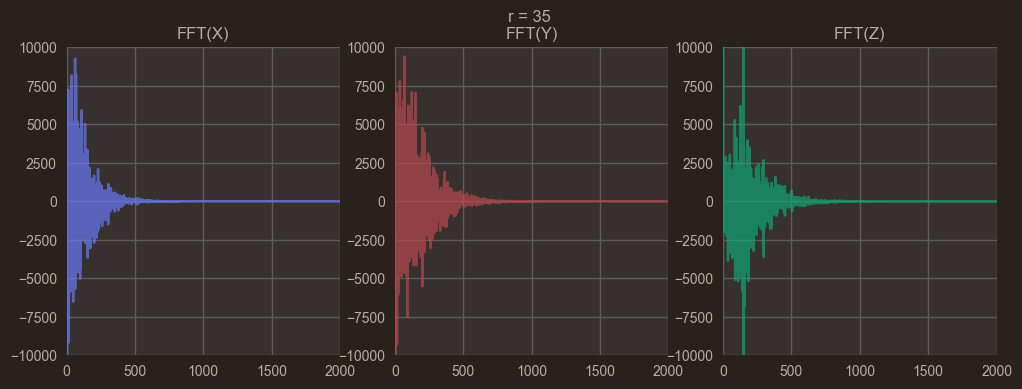

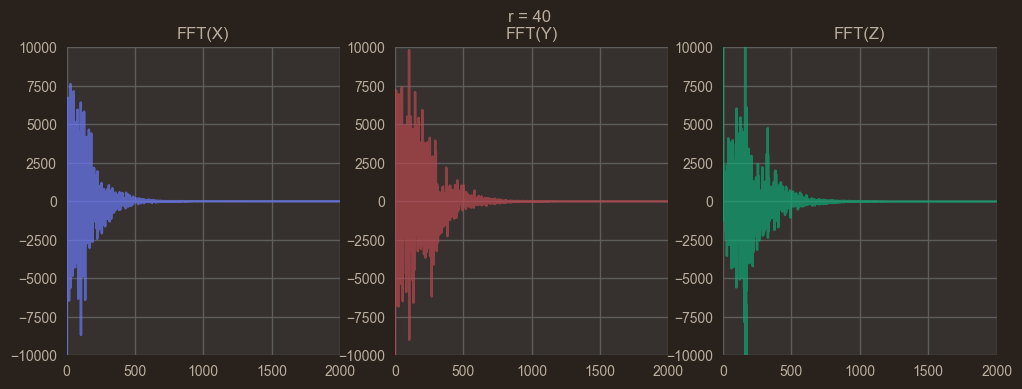

In [19]:
rz = list(np.linspace(20,40,5))

titles = ['FFT(X)','FFT(Y)','FFT(Z)']

for r in rz:
    
    in_0 = [5.0, 5.0, 5.0]
    t_max = 100
    dt = 0.01
    t_steps = t_max/dt
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (10.0, 8/3, r))

    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    for ax, sol, color, title in zip(axes,[solx,soly,solz],[blue,red,green],titles):
        ff = np.real(fft(sol))
        ax.plot(ff, color=color, alpha=0.7)
        ax.set_xlim([0, 20*t_max])
        ax.set_ylim([-10000, 10000])
        ax.set_title(title)
        
    axes[1].set_title("r = %d"%(r) + " \n" + titles[1])

plt.show()

The effect is actually a little more clear if we plot the *power spectra*, which is the FFT of $(x^2, y^2, z^2)$:

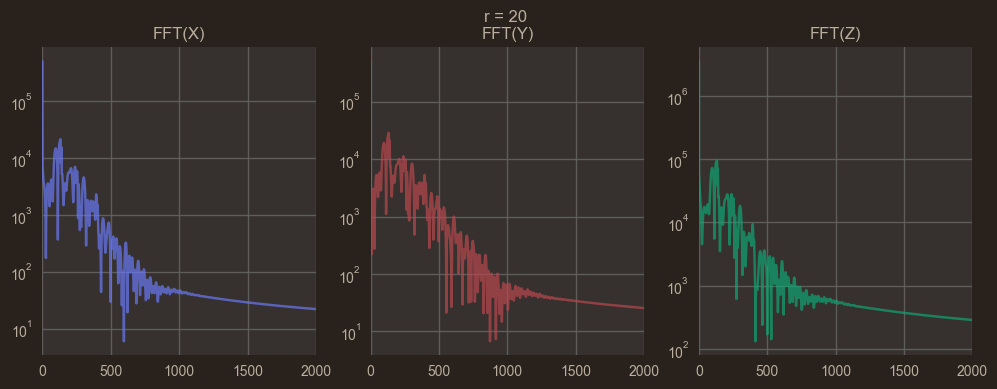

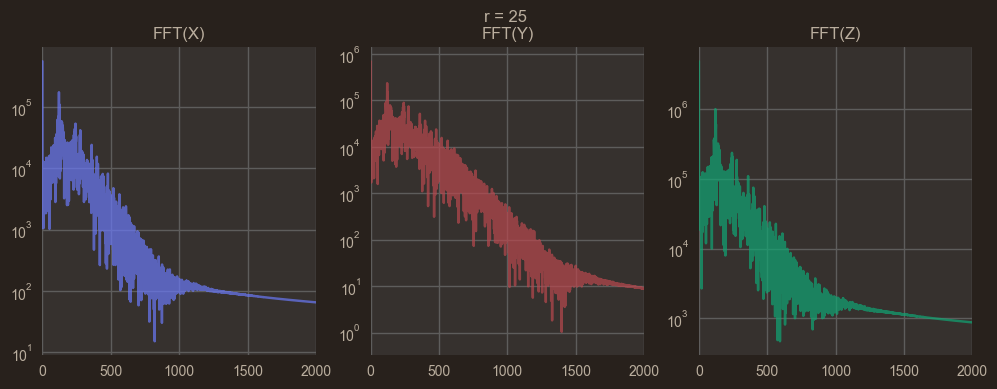

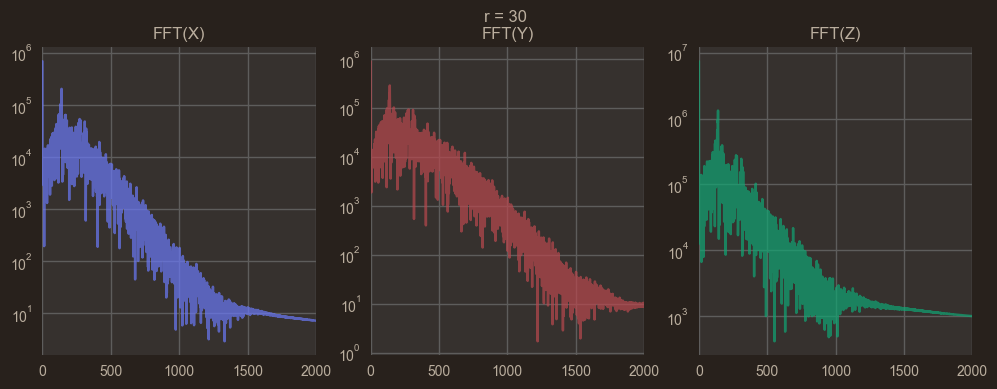

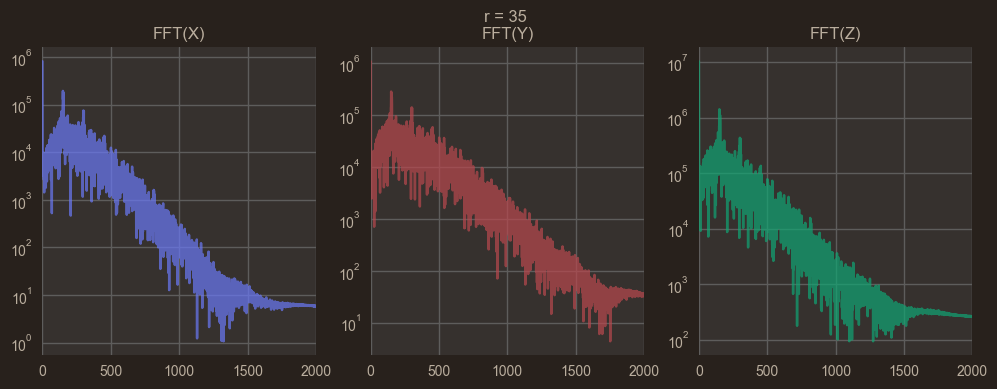

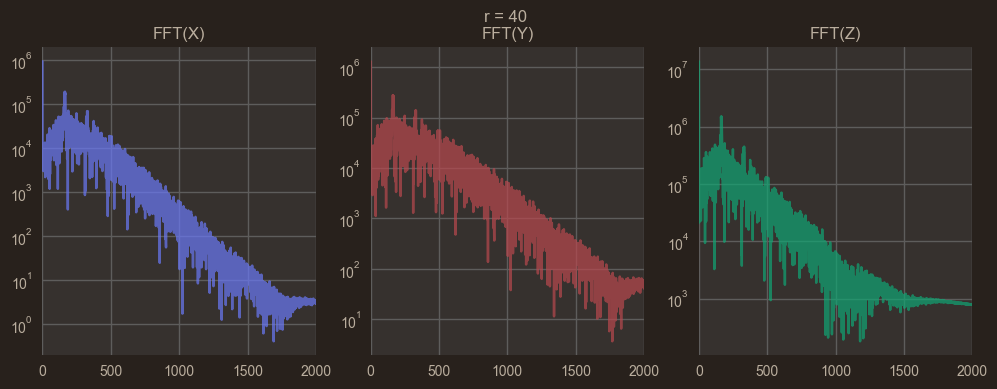

In [20]:
rz = list(np.linspace(20,40,5))

titles = ['FFT(X)','FFT(Y)','FFT(Z)']

for r in rz:
    
    in_0 = [5.0, 5.0, 5.0]
    t_max = 100
    dt = 0.01
    t_steps = t_max/dt
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (10.0, 8/3, r))

    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    for ax, sol, color, title in zip(axes,[solx,soly,solz],[blue,red,green],titles):
        ff = np.abs(fft(sol*sol))
        ax.semilogy(ff, color=color, alpha=0.7)
        ax.set_xlim([0, 20*t_max])
        ax.set_title(title)
        
    axes[1].set_title("r = %d"%(r) + " \n" + titles[1])

plt.show()

## Effect of $b$ on Spectra

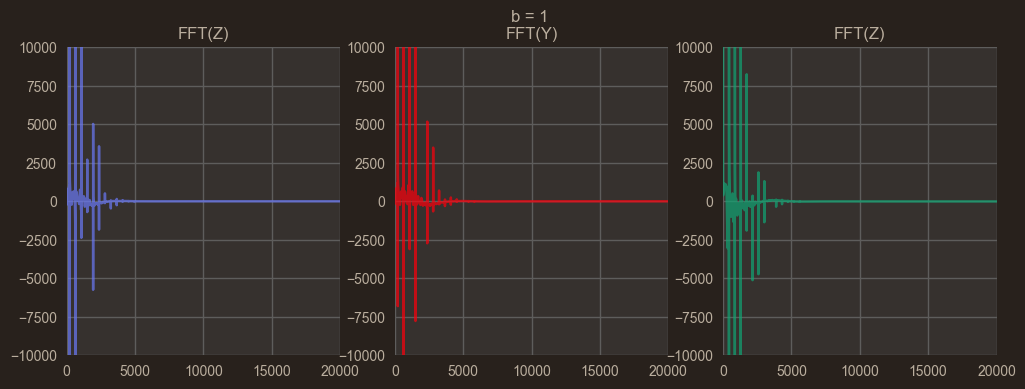

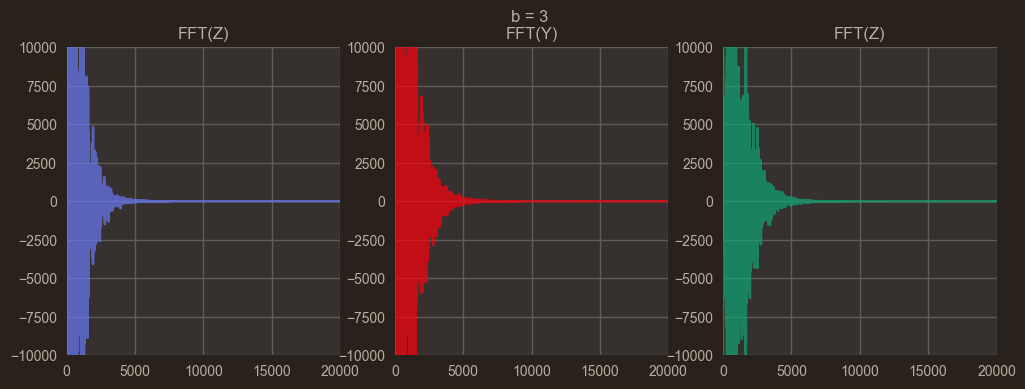

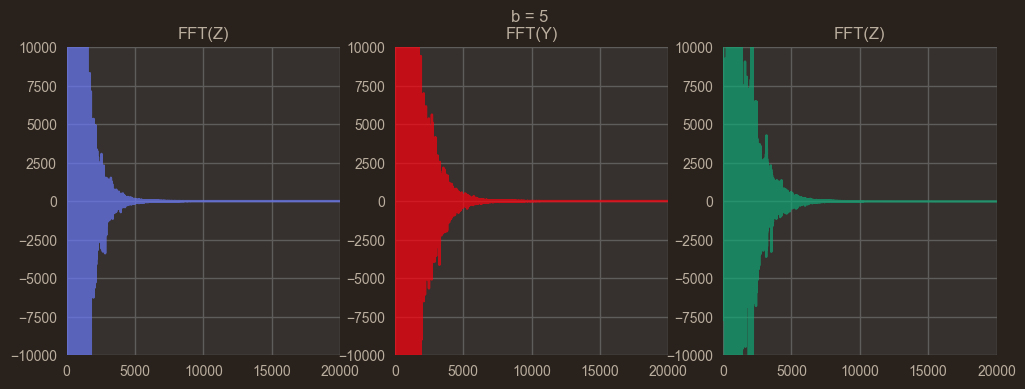

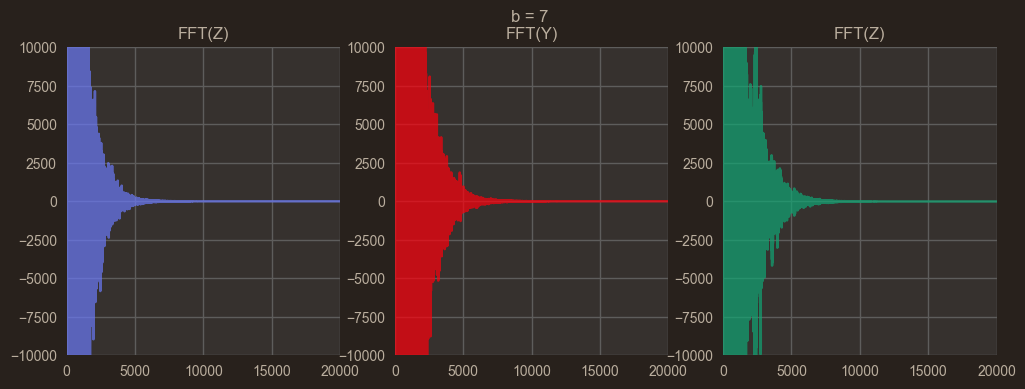

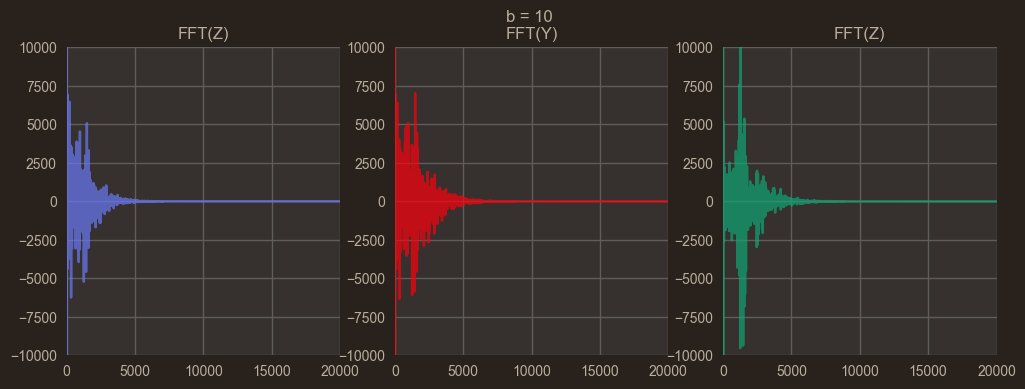

In [16]:
r = 25
bz = list(np.linspace(1,10,5))

titles = ['FFT(X)','FFT(Y)','FFT(Z)']

for b in bz:
    
    in_0 = [5.0, 5.0, 5.0]
    t_max = 1000
    dt = 0.01
    t_steps = t_max/dt
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (10.0, b/3.0, r))

    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    for ax, sol, color in zip(axes,[solx,soly,solz],[blue,red,green]):
        ff = np.real(fft(sol))
        ax.plot(ff, color=color, alpha=0.7)
        ax.set_xlim([0, 20*t_max])
        ax.set_ylim([-10000,10000])
        ax.set_title(title)
        
    axes[1].set_title("b = %d"%(b) + " \n" + titles[1])
        
plt.show()

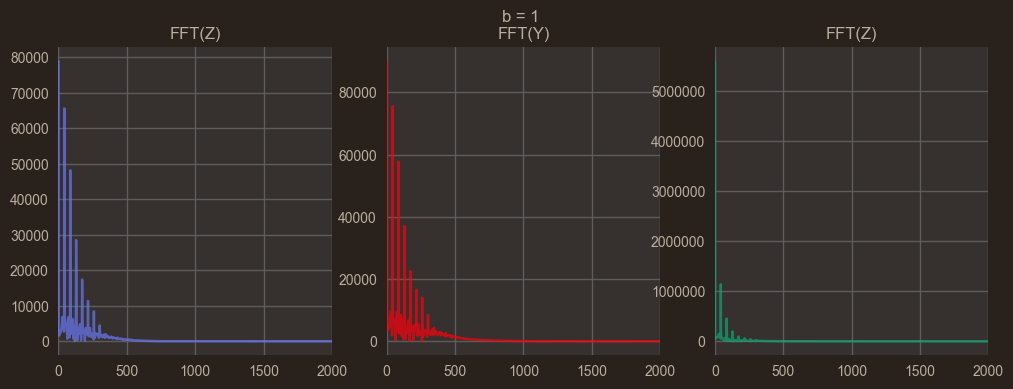

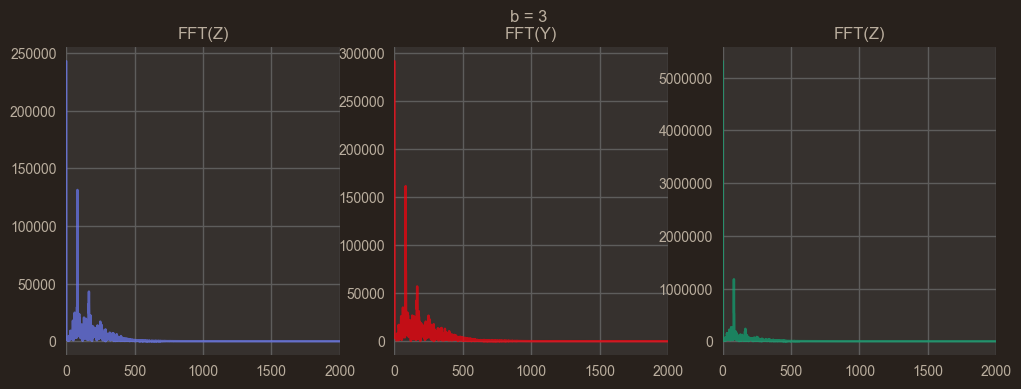

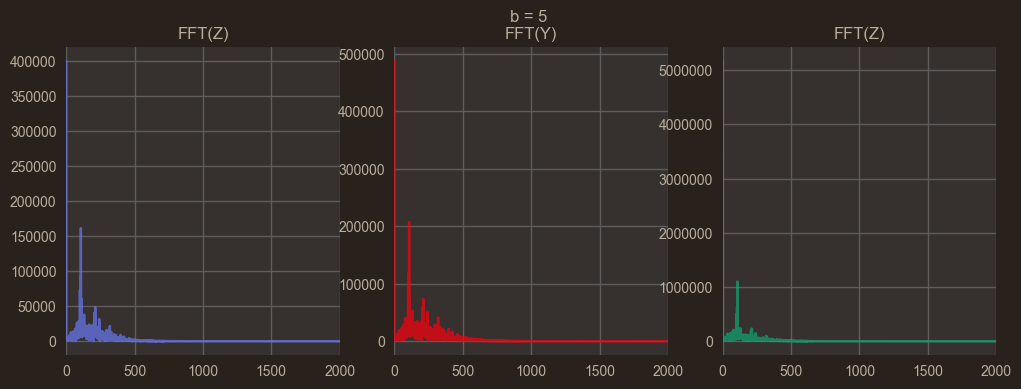

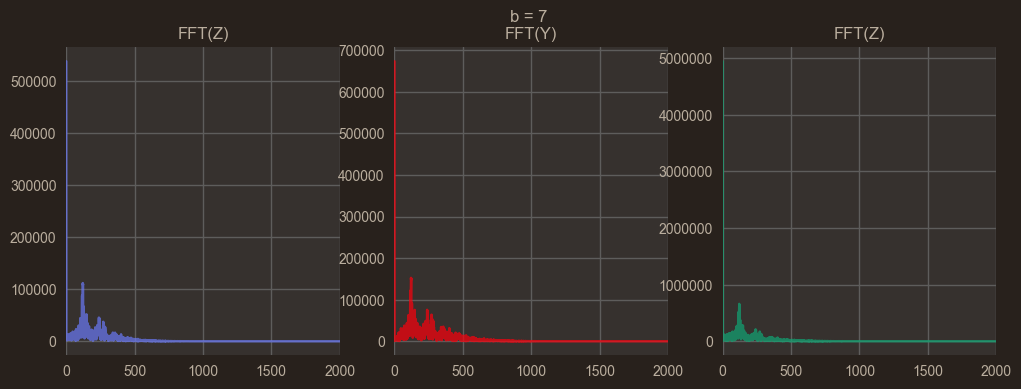

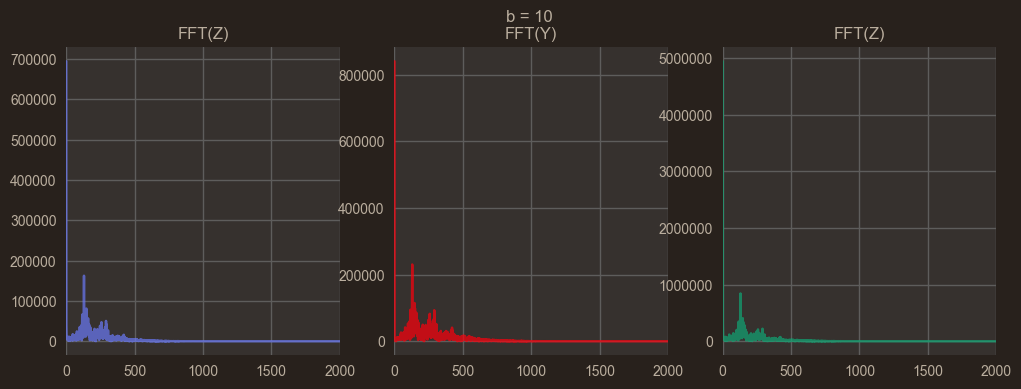

In [17]:
r = 25
bz = list(np.linspace(1,10,5))

titles = ['FFT(X)','FFT(Y)','FFT(Z)']
titles2 = [r'FFT($X^2$)',r'FFT($Y^2$)',r'FFT($Z^2$)']

for b in bz:
    
    in_0 = [5.0, 5.0, 5.0]
    t_max = 100
    dt = 0.01
    t_steps = t_max/dt
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (10.0, b/3.0, r))

    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    for ax, sol, color in zip(axes,[solx,soly,solz],[blue,red,green]):
        ff = np.abs(fft(sol*sol))
        ax.plot(ff, color=color, alpha=0.7)
        ax.set_xlim([0, 20*t_max])
        ax.set_title(title)
        
    axes[1].set_title("b = %d"%(b) + " \n" + titles[1])
        
plt.show()

## Effect of $\sigma$ on Spectra

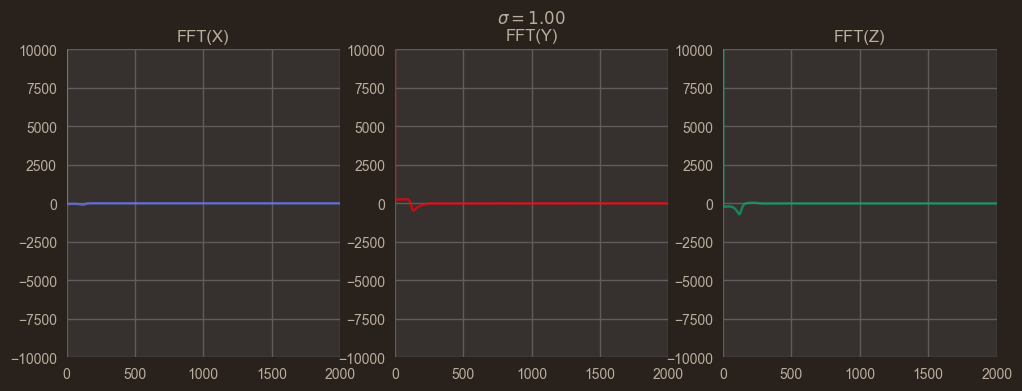

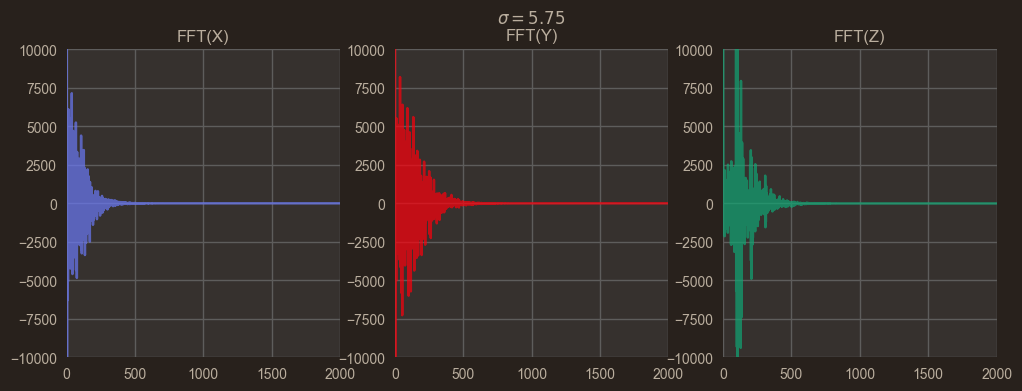

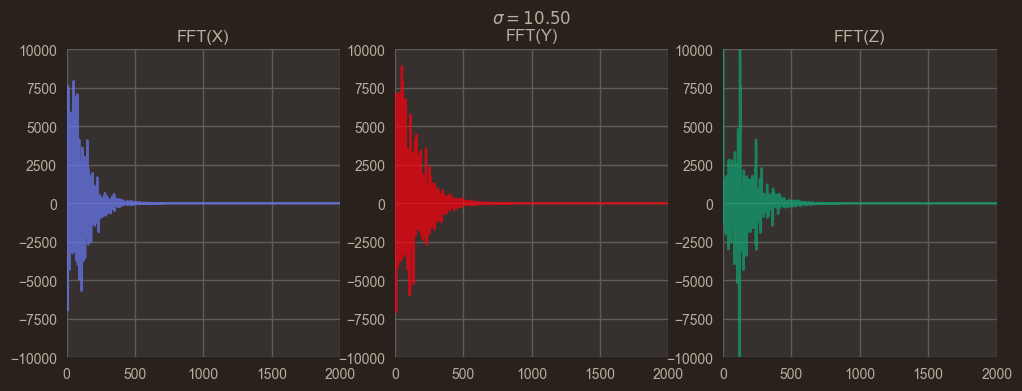

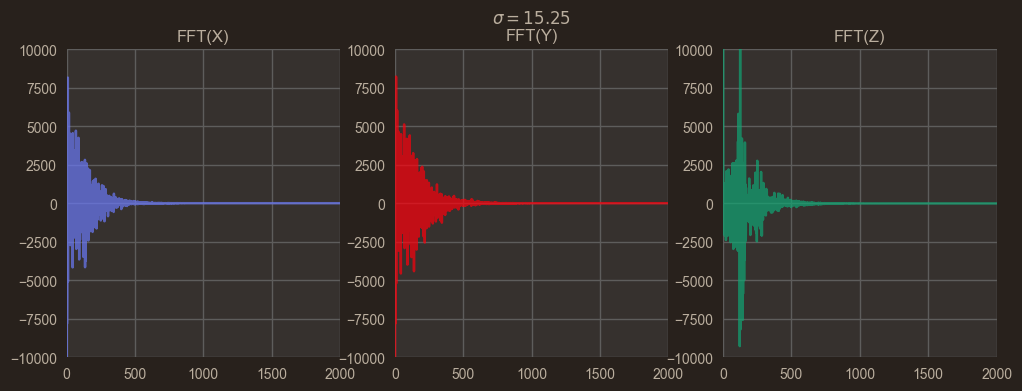

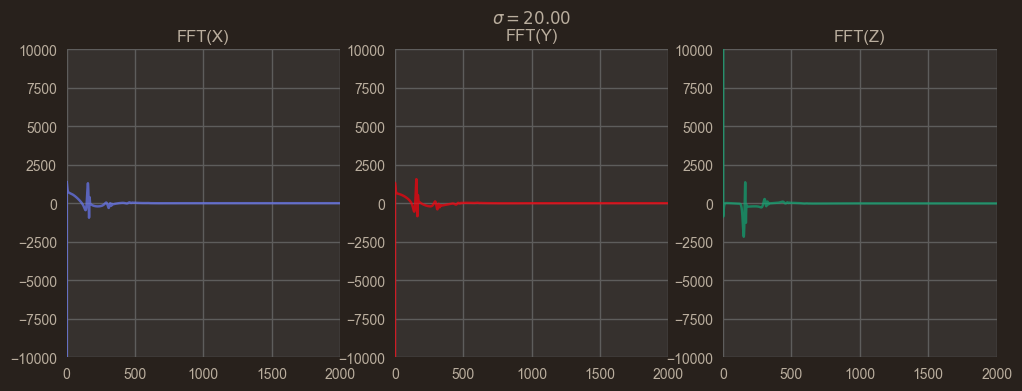

In [18]:
r = 25
b = 8/3
sigmaz = list(np.linspace(1,20,5))

for sigma in sigmaz:
    
    in_0 = [5.0, 5.0, 5.0]
    t_max = 100
    dt = 0.01
    t_steps = t_max/dt
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (sigma, b, r))

    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    for ax, sol, color, title in zip(axes,[solx,soly,solz],[blue,red,green],titles):
        ff = np.real(fft(sol))
        #ax.semilogy(np.abs(ff), color=color, alpha=0.7)
        ax.plot(ff, color=color, alpha=0.7)
        ax.set_xlim([0, 20*t_max])
        ax.set_ylim([-10000,10000])
        ax.set_title(title)
    
    axes[1].set_title(r"$\sigma = %0.2f$"%(sigma) + "\n" + titles[1])
    
plt.show()

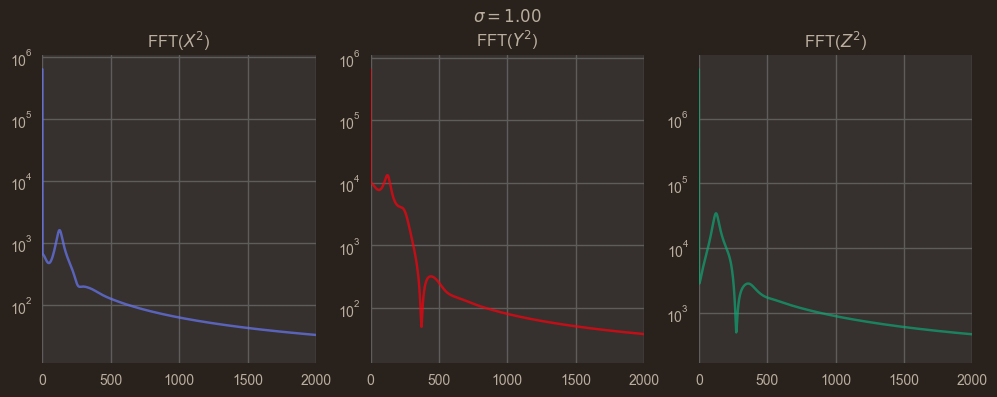

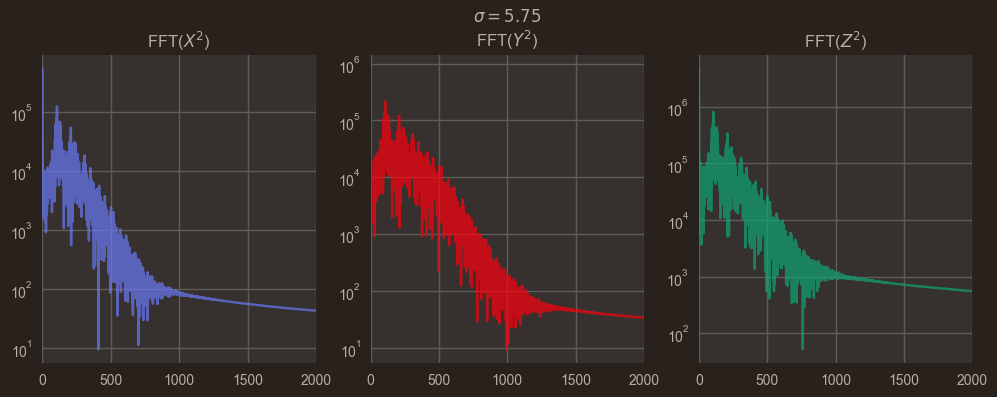

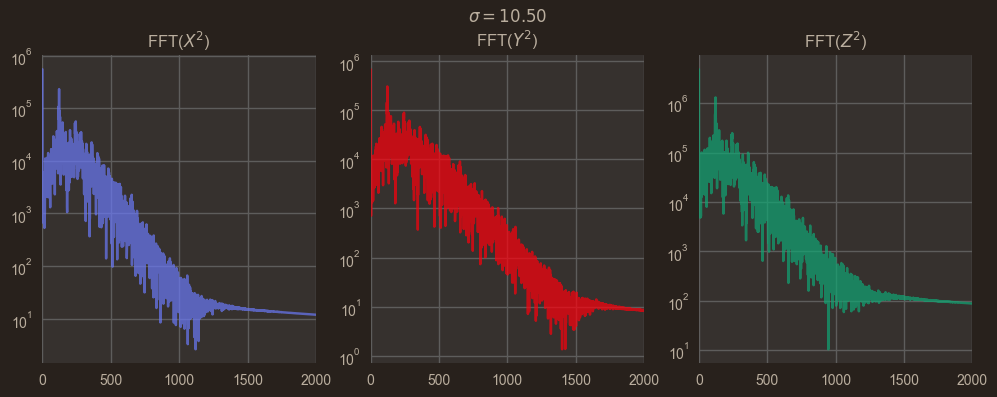

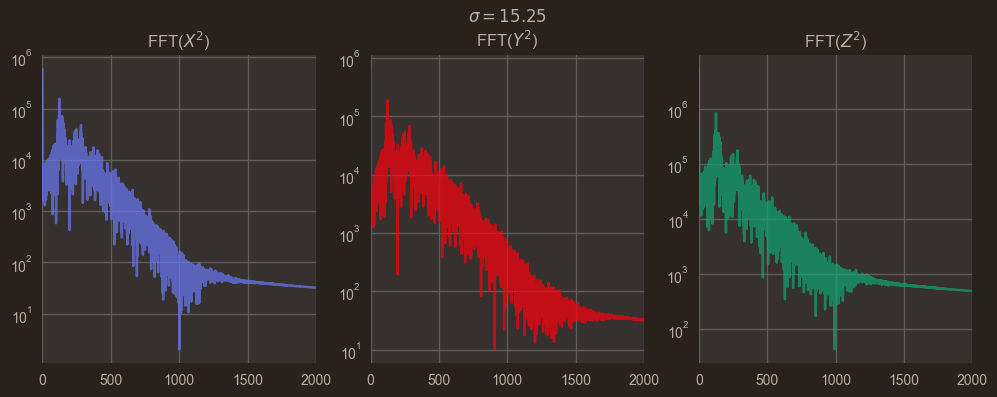

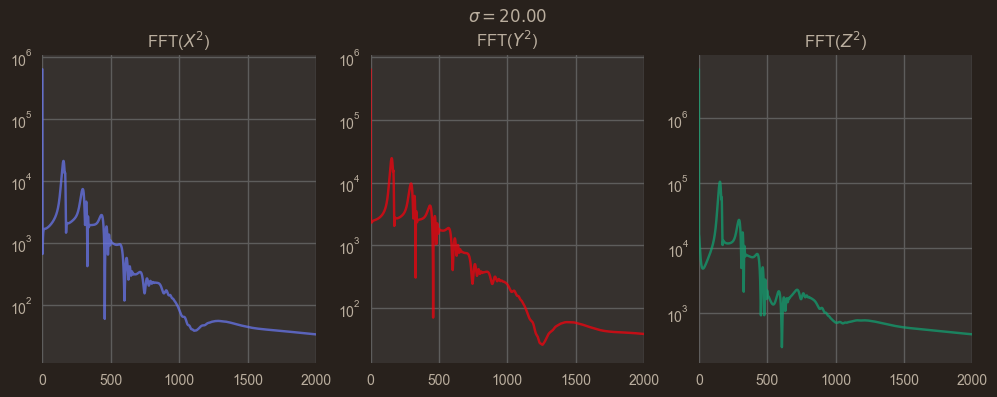

In [19]:
r = 25
b = 8/3
sigmaz = list(np.linspace(1,20,5))

for sigma in sigmaz:
    
    in_0 = [5.0, 5.0, 5.0]
    t_max = 100
    dt = 0.01
    t_steps = t_max/dt
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (sigma, b, r))

    fig = plt.figure(figsize=(12,4))
    axes = [fig.add_subplot(1,3,i+1) for i in range(3)]

    for ax, sol, color, title2 in zip(axes,[solx,soly,solz],[blue,red,green],titles2):
        ff = np.abs(fft(sol*sol))
        ax.semilogy(np.abs(ff), color=color, alpha=0.7)
        ax.set_xlim([0, 20*t_max])
        ax.set_title(title2)
    
    axes[1].set_title(r"$\sigma = %0.2f$"%(sigma) + "\n" + titles2[1])
    
plt.show()